In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
data=pd.read_csv('Car_Purchasing_Data.csv',encoding='ISO-8859-1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [37]:
selected_features = ['Gender','Age' ,'Annual Salary' , 'Credit Card Debt' , 'Net Worth']
X=df[selected_features]
y=df['Car Purchase Amount']

(500, 5)

In [8]:
df=df.drop(['Customer Name','Customer e-mail','Country'],axis=1)

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
y_pred=model.predict(X_test)

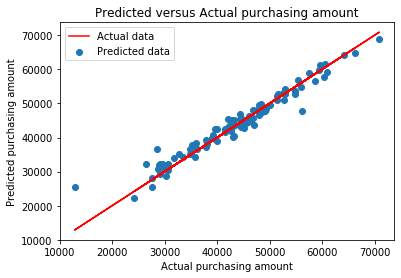

In [54]:
# print regressions
# Our predictions
plt.scatter(y_test,y_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.title('Predicted versus Actual purchasing amount')
plt.ylabel('Predicted purchasing amount')
plt.xlabel('Actual purchasing amount')
plt.legend(['Actual data','Predicted data'])

In [52]:
# calculate the mean error and variance score
print('Root Mean Squarred Error:', "{:.2f}".format(np.sqrt(np.mean((y_test - y_pred) ** 2))))
print("Mean Absolute Error Percentage: ", "{:.1%}".format((np.mean(abs((y_test - y_pred) /y_test)))))

Root Mean Squarred Error: 2403.67
Mean Absolute Error Percentage:  4.8%
